In [55]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from scipy import stats
from pathlib import Path, PureWindowsPath

In [2]:
def extract_dataset_info(data_path):
    # extract information from train.txt
    f = open(os.path.join(data_path, "train.txt"), "r")
    contents_train = f.readlines()
    label_classes, label_train_list, img_train_list = [], [], []
    for sample in contents_train:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        if label not in label_classes:
            label_classes.append(label)
        label_train_list.append(sample[0])
        img_train_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))
    print('Classes: {}'.format(label_classes))

    # extract information from test.txt
    f = open(os.path.join(data_path, "test.txt"), "r")
    contents_test = f.readlines()
    label_test_list, img_test_list = [], []
    for sample in contents_test:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        label_test_list.append(label)
        img_test_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))  # you can directly use img_path if you run in Windows

    return label_classes, label_train_list, img_train_list, label_test_list, img_test_list

In [ ]:
def compute_dsift(img):
    # To do
    return dense_feature

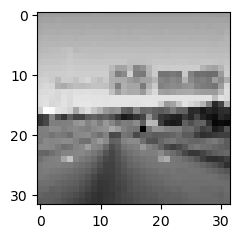

In [67]:
def get_tiny_image(img, output_size):
    # To do
    # img is gray scale image. numpy array.
    # output size will be a tuple of size w,h

    hor_window_size = img.shape[1] // output_size[1]
    vert_window_size = img.shape[0] // output_size[0]
    feature = np.zeros((output_size))
    for row in range(output_size[0]):
        for col in range(output_size[1]):
            feature[row,col] = np.sum(img[row*vert_window_size :(row+1)*vert_window_size-1 , col*hor_window_size : (col+1)*hor_window_size-1])

    feature = feature/(hor_window_size*vert_window_size)
    # Normalize the image.

    # feature = (feature - np.mean(feature)) / np.std(feature)
    # feature = (feature - np.mean(feature)) / np.max(feature)
    feature = (feature - np.mean(feature)) / 255
    # print("Normalization is incomplete check afterwards.")

    return feature

img = cv2.imread("image_0043.jpg",0)
# plt.imshow(img, cmap='grey')
output_size = (32,32)
tiny_image = get_tiny_image(img, output_size)
fig = plt.figure(figsize=(2.5,2.5))
plt.imshow(tiny_image, cmap='grey')

In [68]:
def predict_knn(feature_train, label_train, feature_test, k):
    # To do

    # Initialize kNN.
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(feature_train,label_train)

    dist, indices = neigh.kneighbors(feature_test)
    print("Shape of predict KNN : ", indices.shape)
    print("Indices in predict knn : ", indices)
    
    # label_test_pred = label_train[indices]
    label_test_pred = [label_train[i] for i in indices[:,0]]
    
    return label_test_pred

Shape of predict KNN :  (1500, 1)
Indices in predict knn :  [[1204]
 [1434]
 [1286]
 ...
 [1198]
 [1454]
 [1249]]
Label test Pred :  [13, 15, 13, 13, 11, 15, 15, 11, 5, 14, 14, 13, 6, 10, 11, 10, 13, 15, 14, 15, 13, 5, 12, 13, 13, 6, 15, 3, 15, 13, 12, 13, 15, 12, 13, 12, 12, 13, 8, 13, 12, 5, 15, 13, 14, 12, 15, 15, 13, 13, 13, 6, 5, 8, 3, 1, 1, 12, 15, 12, 15, 11, 13, 11, 3, 15, 9, 14, 11, 12, 3, 14, 9, 12, 11, 1, 6, 11, 5, 13, 14, 13, 9, 12, 11, 13, 8, 14, 14, 12, 15, 1, 15, 4, 15, 15, 4, 6, 1, 14, 4, 12, 13, 13, 15, 15, 12, 12, 15, 15, 11, 14, 11, 6, 15, 13, 13, 6, 13, 13, 15, 15, 13, 9, 12, 13, 11, 12, 12, 13, 11, 12, 6, 6, 11, 12, 13, 15, 15, 12, 13, 13, 12, 13, 13, 12, 10, 13, 5, 15, 12, 14, 13, 13, 13, 13, 13, 12, 11, 15, 15, 14, 12, 15, 11, 15, 13, 6, 14, 12, 11, 4, 12, 14, 13, 9, 6, 15, 11, 15, 6, 13, 12, 15, 13, 4, 9, 13, 13, 15, 8, 15, 7, 9, 12, 15, 13, 2, 11, 9, 11, 11, 11, 6, 13, 12, 5, 13, 13, 13, 12, 11, 5, 15, 4, 14, 15, 9, 14, 12, 4, 11, 13, 14, 13, 12, 10, 11, 3, 12,

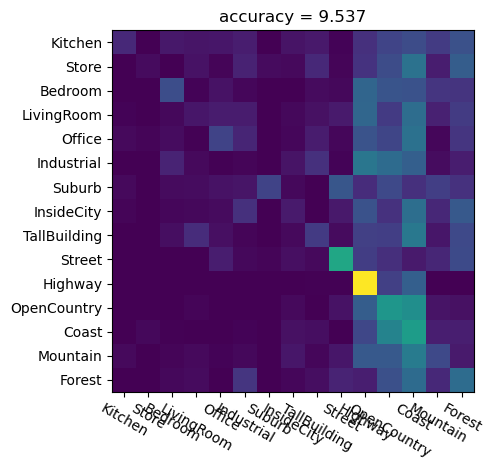

(array([[3.750e+00, 0.000e+00, 2.150e+00, 1.890e+00, 2.000e+00, 2.610e+00,
         0.000e+00, 1.770e+00, 2.200e+00, 2.800e-01, 4.520e+00, 6.710e+00,
         7.660e+00, 5.730e+00, 8.230e+00],
        [0.000e+00, 9.700e-01, 0.000e+00, 1.560e+00, 4.800e-01, 3.180e+00,
         9.200e-01, 9.000e-01, 3.760e+00, 4.600e-01, 4.800e+00, 7.710e+00,
         1.246e+01, 2.640e+00, 9.660e+00],
        [0.000e+00, 0.000e+00, 7.760e+00, 3.400e-01, 1.640e+00, 5.600e-01,
         0.000e+00, 0.000e+00, 1.000e+00, 7.400e-01, 1.069e+01, 8.520e+00,
         8.300e+00, 5.060e+00, 4.890e+00],
        [2.700e-01, 0.000e+00, 6.500e-01, 1.940e+00, 2.480e+00, 2.470e+00,
         0.000e+00, 7.200e-01, 1.460e+00, 2.390e+00, 1.090e+01, 5.650e+00,
         1.180e+01, 3.070e+00, 5.700e+00],
        [8.400e-01, 4.800e-01, 1.040e+00, 1.900e-01, 6.690e+00, 3.360e+00,
         0.000e+00, 5.300e-01, 2.500e+00, 5.600e-01, 8.470e+00, 6.940e+00,
         1.225e+01, 5.900e-01, 5.060e+00],
        [0.000e+00, 0.000e+00, 3.25

In [74]:
def classify_knn_tiny(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do

    output_size = (16,16)

    # Map labels to integers.
    label_map = {key : value+1 for value, key in enumerate(label_classes)}
    label_train_int = np.array([label_map[item] for item in label_train_list])
    label_test_int = np.array([label_map[item] for item in label_test_list])

    label_classes_int = np.array([label_map[item] for item in label_classes])
    # print(label_test_int)

    # Get the tiny image of all the train items.
    feature_train = np.zeros((len(img_train_list), output_size[0]*output_size[1]))
    for i,path_img in enumerate(img_train_list):
        img = cv2.imread(path_img,0) # Read Image, 0 to read as greyscale.
        feature_train[i] = get_tiny_image(img, output_size).flatten()   # Get features using tiny image funtion.

    # Get the tiny image of all the test items.
    feature_test = np.zeros((len(img_test_list), output_size[0]*output_size[1]))
    for i,path_img in enumerate(img_test_list):
        img = cv2.imread(path_img,0) # 0 to read as greyscale.
        feature_test[i] = get_tiny_image(img, output_size).flatten()
    
    # Predict labels for the test images.
    k_neighbour = 1
    label_test_pred = predict_knn(feature_train, label_test_int, feature_test, k_neighbour)

    print("Label test Pred : ", label_test_pred)

    # Make the confusion Matrix.
    confusion = np.zeros((len(label_classes), len(label_classes)))
    for row,cls in enumerate(label_classes_int):
        # Get the indices where test data has this item.(ground truth)
        print("Row is : ", row, " Cls is : ", cls)
        indices = np.where(label_test_int == cls)[0]
        print("Indices in the loop  : ", indices)
        # Get the predictions for this class of data.
        preds_temp = np.array([label_test_pred[i] for i in indices])
        print('preds temps : ', preds_temp)
        for col in range(len(label_classes)):
            # True label for this is cls.
            confusion[row,col] = np.sum(np.where(preds_temp == label_classes_int[col])) / len(indices)


    # Find the accuracy as mean of the correct predictions.
    accuracy = np.mean(np.diagonal(confusion))

    visualize_confusion_matrix(confusion, accuracy, label_classes)

    return confusion, accuracy

classify_knn_tiny(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)

In [ ]:
def build_visual_dictionary(dense_feature_list, dict_size):
    # To do
    return vocab

In [ ]:
def compute_bow(feature, vocab):
    # To do
    return bow_feature

In [ ]:
def classify_knn_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do
    visualize_confusion_matrix(confusion, accuracy, label_classes)
    return confusion, accuracy

In [ ]:
def predict_svm(feature_train, label_train, feature_test, n_classes):
    # To do
    return label_test_pred

In [ ]:
def classify_svm_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list):
    # To do
    visualize_confusion_matrix(confusion, accuracy, label_classes)
    return confusion, accuracy

In [35]:
def visualize_confusion_matrix(confusion, accuracy, label_classes):
    plt.title("accuracy = {:.3f}".format(accuracy))
    plt.imshow(confusion)
    ax, fig = plt.gca(), plt.gcf()
    plt.xticks(np.arange(len(label_classes)), label_classes)
    plt.yticks(np.arange(len(label_classes)), label_classes)
    # set horizontal alignment mode (left, right or center) and rotation mode(anchor or default)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="center", rotation_mode="default")
    # avoid top and bottom part of heatmap been cut
    ax.set_xticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.set_yticks(np.arange(len(label_classes) + 1) - .5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    fig.tight_layout()
    plt.show()

In [59]:
if __name__ == '__main__':
    # To do: replace with your dataset path
    label_classes, label_train_list, img_train_list, label_test_list, img_test_list = extract_dataset_info("./scene_classification_data")
    
    # classify_knn_tiny(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)

    # classify_knn_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)
    
    # classify_svm_bow(label_classes, label_train_list, img_train_list, label_test_list, img_test_list)

Classes: ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']


In [11]:
print(len(label_classes))
type(label_classes)

15


list

In [33]:
print(len(label_train_list))
print(label_train_list[0])

1500
Kitchen


In [39]:
len(label_train_list)

1500

In [40]:
len(label_test_list)

1500

In [42]:
len(label_test_list)
label_test_list[0]

'Kitchen'